## Observations and Insights

After analyzing and reviewing the data from Pymaceuticals dataset, I have listed 3 of my observations from figures and tables generated. 
 
     1. First of all, I realized that even tho the study started with 250 mouses. After 45 days, there were only 130 mouses that survived through out this period. The rest might have died!
     2. Secondly, according to Summary statistics table, only Capomulin and Ramicane treatments actually worked on these mouses. The average tumor volume for Capomulin and Ramicane are 40.68 mm^3 and 40.22 mm^3 respectively.
     3. Finally, according to the scatter plot and the linear regression line that was generated. There is a strong corroletion between mouses weights and their average tumor volume. In fact the r-squared value is 0.84 which is more than 0.7 which suggests the strong corroletion. Also, the slope of the regression line is 0.95.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Cleaning the data
drug_tumor = data[["Drug Regimen", "Tumor Volume (mm3)"]]

# Group by Drug Regimen
group_drug = drug_tumor.groupby(["Drug Regimen"])

# To find Mean, Median, Variance, STD and SEM of Tumor Volume
summary = round(group_drug.mean(),2)

# Rename
summary = summary.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Mean"})

# To find Mean, Median, Variance, STD and SEM of Tumor Volume
summary["Tumor Volume Median"] = round(group_drug.median(),2)
summary["Tumor Volume Variance"] = round(group_drug.var(),2)
summary["Tumor Volume STD"] = round(group_drug.std(),2)
summary["Tumor Volume SEM"] = round(group_drug.sem(),2)

# Display results
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Number of Data Points')

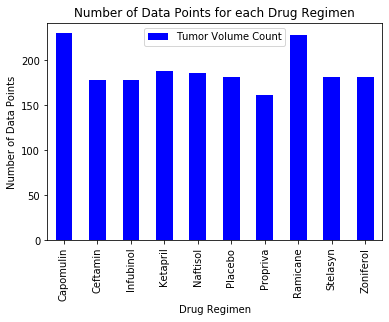

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# To count data points
data_points = group_drug.count()

# Rename
data_points = data_points.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Count"})

# Pandas bar plot
data_bar = data_points.plot(kind="bar", facecolor="blue")

# Title, x label, y label
plt.title('Number of Data Points for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

Text(0, 0.5, 'Number of Data Points')

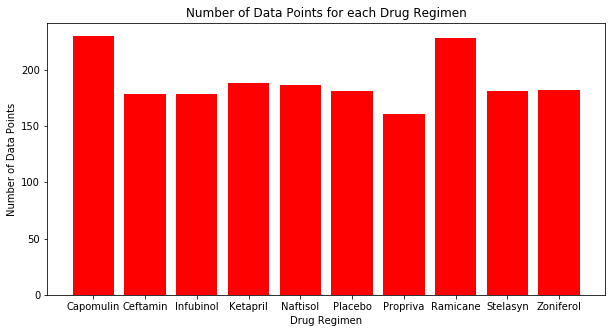

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# To get and sort out drug regimen
drugs = data["Drug Regimen"].unique()
drugs.sort()

# Size of the plot
plt.figure(figsize=(10,5))

# Matplot bar plot
plt.bar(drugs, data_points["Tumor Volume Count"] , color="red", align="center",)

# Title, x label, y label
plt.title("Number of Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

Text(0.5, 1.0, 'Distribution of female vs male mice')

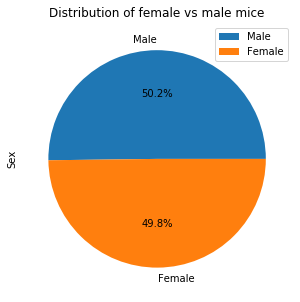

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# To count how many male female mouses are in the study.
data_gender = pd.DataFrame(mouse_metadata["Sex"].value_counts())

# Pandas pie chart
gender_plot = data_gender.plot.pie(y='Sex', figsize=(5, 5), autopct="%1.1f%%")

# Title
plt.title("Distribution of female vs male mice")

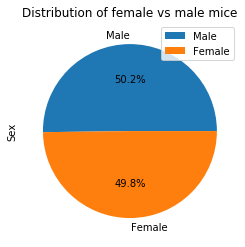

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Createing labels for matplot pie chart
labels = ["Male", "Female"]

# Matplot pie chart
plt.pie(data_gender['Sex'],autopct="%1.1f%%", labels = labels)

# Title and y label and legend
plt.title("Distribution of female vs male mice")
plt.ylabel("Sex")
plt.legend()
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Cleaning the data
data_reduced = data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

# To only get the final volume.
final_volume = data_reduced.loc[data_reduced["Timepoint"] == 45, :]

# To extract the data for mentioned four treatments
data_capomulin = final_volume.loc[final_volume["Drug Regimen"] == "Capomulin"]
data_ramicane = final_volume.loc[final_volume["Drug Regimen"] == "Ramicane"]
data_infubinol = final_volume.loc[final_volume["Drug Regimen"] == "Infubinol"]
data_ceftamin = final_volume.loc[final_volume["Drug Regimen"] == "Ceftamin"]

# Rename
data_capomulin = data_capomulin.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
data_ramicane = data_ramicane.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
data_infubinol = data_infubinol.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
data_ceftamin = data_ceftamin.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})

In [8]:
# Capomulin Analysis

# Final Volume
final_v_cap = data_capomulin["Final Tumor Volume"]

# Calculating the IQR and quantitatively
quartiles_cap = final_v_cap.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

# Printing the results
print(f"The lower quartile of final tumor volume for Capomulin treatment regimen is: {lowerq_cap}")
print(f"The the median of final tumor volume for Capomulin treatment regimen is: {quartiles_cap[0.5]} ")
print(f"The upper quartile of final tumor volume for Capomulin treatment regimen is: {upperq_cap}")
print(f"The interquartile range of final tumor volume for Capomulin treatment regimen is: {iqr_cap}")

# To see if there is an outlier
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
print(f"Since the minimum final tumor volume is {final_v_cap.min()} which is greater than {lower_bound_cap} and the maximum final tumor volume is {final_v_cap.max()} which is less than {upper_bound_cap}. Therefore, there is no outlier")


The lower quartile of final tumor volume for Capomulin treatment regimen is: 32.37735684
The the median of final tumor volume for Capomulin treatment regimen is: 37.31184577 
The upper quartile of final tumor volume for Capomulin treatment regimen is: 40.1592203
The interquartile range of final tumor volume for Capomulin treatment regimen is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Since the minimum final tumor volume is 23.34359787 which is greater than 20.70456164999999 and the maximum final tumor volume is 47.68596303 which is less than 51.83201549. Therefore, there is no outlier


In [9]:
# Ramicanein Analysis

# Final Volume
final_v_ram = data_ramicane["Final Tumor Volume"]

# Calculating the IQR and quantitatively
quartiles_ram = final_v_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

# Printing the results
print(f"The lower quartile of final tumor volume for Ramicane treatment regimen is: {lowerq_ram}")
print(f"The the median of final tumor volume for Ramicane treatment regimen is: {quartiles_ram[0.5]} ")
print(f"The upper quartile of final tumor volume for Ramicane treatment regimen is: {upperq_ram}")
print(f"The interquartile range of final tumor volume for Ramicane treatment regimen is: {iqr_ram}")

# To see if there is an outlier
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")
print(f"Since the minimum final tumor volume is {final_v_ram.min()} which is greater than {lower_bound_ram} and the maximum final tumor volume is {final_v_ram.max()} which is less than {upper_bound_ram}. Therefore, there is no outlier")


The lower quartile of final tumor volume for Ramicane treatment regimen is: 30.981175224999998
The the median of final tumor volume for Ramicane treatment regimen is: 34.848627300000004 
The upper quartile of final tumor volume for Ramicane treatment regimen is: 38.508305307499995
The interquartile range of final tumor volume for Ramicane treatment regimen is: 7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
Since the minimum final tumor volume is 22.05012627 which is greater than 19.690480101250003 and the maximum final tumor volume is 45.22086888 which is less than 49.79900043124999. Therefore, there is no outlier


In [10]:
# Infobunol Analysis

# Final Volume
final_v_inf = data_infubinol["Final Tumor Volume"]

# Calculating the IQR and quantitatively
quartiles_inf = final_v_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

# Printing the results
print(f"The lower quartile of final tumor volume for Infobunol treatment regimen is: {lowerq_inf}")
print(f"The the median of final tumor volume for Infobunol treatment regimen is: {quartiles_inf[0.5]} ")
print(f"The upper quartile of final tumor volume for Infobunol treatment regimen is: {upperq_inf}")
print(f"The interquartile range of final tumor volume for Infobunol treatment regimen is: {iqr_inf}")

# To see if there is an outlier
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")
print(f"Since the minimum final tumor volume is {final_v_inf.min()} which is greater than {lower_bound_inf} and the maximum final tumor volume is {final_v_inf.max()} which is less than {upper_bound_inf}. Therefore, there is no outlier")


The lower quartile of final tumor volume for Infobunol treatment regimen is: 62.75445141
The the median of final tumor volume for Infobunol treatment regimen is: 66.08306589 
The upper quartile of final tumor volume for Infobunol treatment regimen is: 67.68556862
The interquartile range of final tumor volume for Infobunol treatment regimen is: 4.9311172099999965
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
Since the minimum final tumor volume is 60.91876652 which is greater than 55.35777559500001 and the maximum final tumor volume is 72.2267309 which is less than 75.08224443499999. Therefore, there is no outlier


In [11]:
# Ceftamin Analysis

# Final Volume
final_v_cef = data_ceftamin["Final Tumor Volume"]

# Calculating the IQR and quantitatively
quartiles_cef = final_v_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef


# Printing the results
print(f"The lower quartile of final tumor volume for Ceftamin treatment regimen is: {lowerq_cef}")
print(f"The the median of final tumor volume for Ceftamin treatment regimen is: {quartiles_cef[0.5]} ")
print(f"The upper quartile of final tumor volume for Ceftamin treatment regimen is: {upperq_cef}")
print(f"The interquartile range of final tumor volume for Ceftamin treatment regimen is: {iqr_cef}")

# To see if there is an outlier
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")
print(f"Since the minimum final tumor volume is {final_v_cef.min()} which is greater than {lower_bound_cef} and the maximum final tumor volume is {final_v_cef.max()} which is less than {upper_bound_cef}. Therefore, there is no outlier")


The lower quartile of final tumor volume for Ceftamin treatment regimen is: 61.43389223
The the median of final tumor volume for Ceftamin treatment regimen is: 64.29983003 
The upper quartile of final tumor volume for Ceftamin treatment regimen is: 67.52748237
The interquartile range of final tumor volume for Ceftamin treatment regimen is: 6.093590140000003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.
Since the minimum final tumor volume is 59.74190064 which is greater than 52.29350701999999 and the maximum final tumor volume is 68.92318457 which is less than 76.66786758. Therefore, there is no outlier


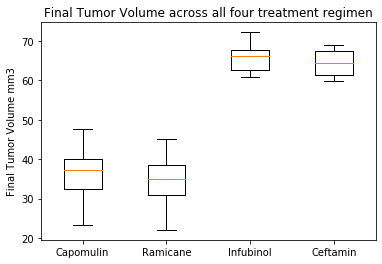

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
plt.boxplot([final_v_cap, final_v_ram, final_v_inf, final_v_cef],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax1.set_title('Final Tumor Volume across all four treatment regimen')
ax1.set_ylabel('Final Tumor Volume mm3')
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

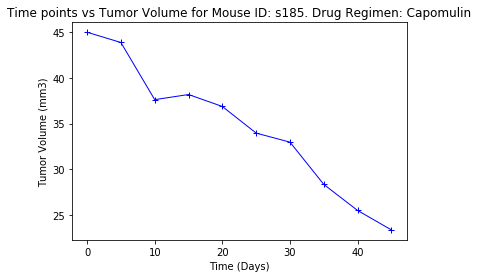

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# To reduce the data to get data for a single mouse with Capomulin treatment
single_mouse = data.loc[data["Mouse ID"] == "s185"]

# Matplot line chart
single_mouse_line, = plt.plot(single_mouse["Timepoint"],single_mouse["Tumor Volume (mm3)"] , marker="+",color="blue", linewidth=1, label="Fahreneit")

# Title, x label, y label
plt.title("Time points vs Tumor Volume for Mouse ID: s185. Drug Regimen: Capomulin")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


The r-squared is: 0.84
The correlation coefficient between weights and average tumor volume is 0.84
The equation of linear regression line is y = 0.95*x + 21.55


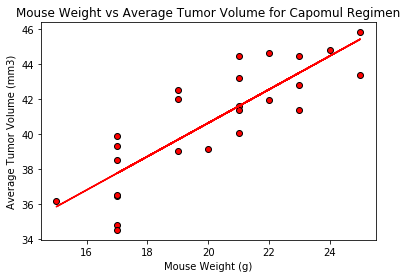

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# To reduce the data to only get data for mices under Capomulin treatment
capomulin = data.loc[data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID
group_capomulin = capomulin.groupby(["Mouse ID"])

# The store weights and Tumor Volume in lists
weights = group_capomulin["Weight (g)"].mean()
tumor_v = group_capomulin["Tumor Volume (mm3)"].mean()

# To get regressian variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, tumor_v)

# Equation of the regression line
regress_values = weights * slope + intercept

# To plot the scatter plot using matplot
plt.scatter(weights,tumor_v , marker="o", facecolors="red", edgecolors="black")

# To plot the refression line
plt.plot(weights,regress_values,"r-")

# Title, x label, y label
plt.title("Mouse Weight vs Average Tumor Volume for Capomul Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# To print r-squared or correlation coefficient using two different methods
print(f"The r-squared is: {round(rvalue,2)}")
print(f"The correlation coefficient between weights and average tumor volume is {round(st.pearsonr(weights,tumor_v)[0],2)}")

# To print the equation of the regression line
print(f"The equation of linear regression line is y = {round(slope,2)}*x + {round(intercept,2)}")